In capital markets, volume, or trading volume, is the amount (total number) of a security (or a given set of securities, or an entire market) that was traded during a given period of time. 

In [1]:
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
all_stocks=pd.read_csv('stock-time-series-20050101-to-20171231/all_stocks_2006-01-01_to_2018-01-01.csv')
all_stocks['Date']=pd.to_datetime(all_stocks['Date'])
all_stocks.loc[:,'year']=all_stocks.loc[:,'Date'].map(lambda x: x.year)
all_stocks.loc[:,'month']=all_stocks.loc[:,'Date'].map(lambda x: x.month)
all_stocks.loc[:,'quarter']=all_stocks.loc[:,'Date'].map(lambda x:x.quarter)

In [3]:
all_stocks.head()

,Date,Open,High,Low,Close,Volume,Name,year,month,quarter
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM,2006,1,1
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM,2006,1,1
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM,2006,1,1
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM,2006,1,1
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM,2006,1,1


In [4]:
stocks_1718=pd.read_csv('stock-time-series-20050101-to-20171231/all_stocks_2017-01-01_to_2018-01-01.csv')
stocks_1718['Date']=pd.to_datetime(stocks_1718['Date'])
stocks_1718.loc[:,'year']=stocks_1718.loc[:,'Date'].map(lambda x: x.year)
stocks_1718.loc[:,'month']=stocks_1718.loc[:,'Date'].map(lambda x: x.month)
stocks_1718.loc[:,'quarter']=stocks_1718.loc[:,'Date'].map(lambda x:x.quarter)

In [5]:
stocks_1718.head()

,Date,Open,High,Low,Close,Volume,Name,year,month,quarter
0,2017-01-03,178.83,180.00,177.22,178.05,2510055,MMM,2017,1,1
1,2017-01-04,178.03,178.90,177.61,178.32,1541985,MMM,2017,1,1
2,2017-01-05,178.26,179.14,176.89,177.71,1447848,MMM,2017,1,1
3,2017-01-06,177.29,178.60,175.80,178.23,1625049,MMM,2017,1,1
4,2017-01-09,178.37,178.38,177.20,177.27,1622625,MMM,2017,1,1


## 1. Relationship between Average Trading Volume and Close Price of Several Stocks in 2016

Text(0.5,1,'Relationship between Average Trading Volume and Close Price\n in 2016')

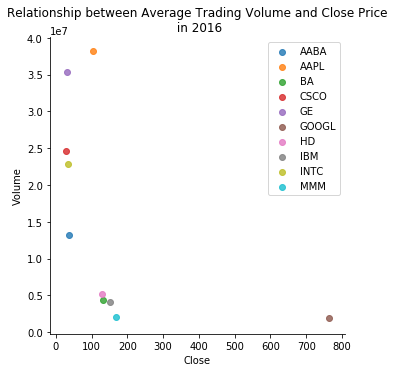

In [406]:
stock=all_stocks[(all_stocks['Name']=='MMM')|(all_stocks['Name']=='GOOGL')|(all_stocks['Name']=='IBM')|
               (all_stocks['Name']=='AABA')|(all_stocks['Name']=='AAPL')|(all_stocks['Name']=='BA')|(all_stocks['Name']=='GE')|
               (all_stocks['Name']=='HD')|(all_stocks['Name']=='INTC')|(all_stocks['Name']=='CSCO')]
stock=stock.groupby(['Name','year'] ,as_index=False)['Close','Volume'].mean()
stock=stock[stock['year']==2016]
#####plot
plt.figure(figsize=(15,8))
sns.lmplot( x='Close', y='Volume', data=stock, fit_reg=False, hue='Name', legend=False)
plt.legend(loc='best')
plt.title('Relationship between Average Trading Volume and Close Price\n in 2016')
 

## 2. Boxplot of AABA trading volumes from 2006 to 2017 separately

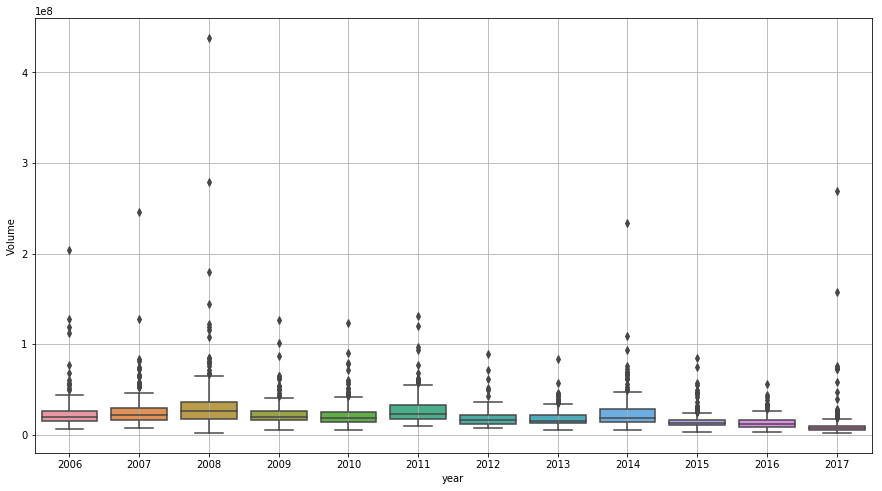

In [390]:
AABA=all_stocks[all_stocks['Name']=='AABA']
plt.figure(figsize=(15,8))
sns.boxplot(x='year', y='Volume', data=AABA)
plt.grid()

# 3. Visualize changes of each year average Volume and Close Proce for a certain stock using scatter plot

In [443]:
def Price_Volume_Change(stock):
    s=all_stocks[all_stocks['Name']==stock]
    s=s.groupby(['Name','year'] ,as_index=False)['Close','Volume'].mean()
    s['v']=s['Volume']/10000
    plt.figure(figsize=(15,8))
    plt.scatter(s['year'],s['Close'],s['v'],c='r',alpha=0.5,label=stock)
    plt.grid(True)
    plt.show()

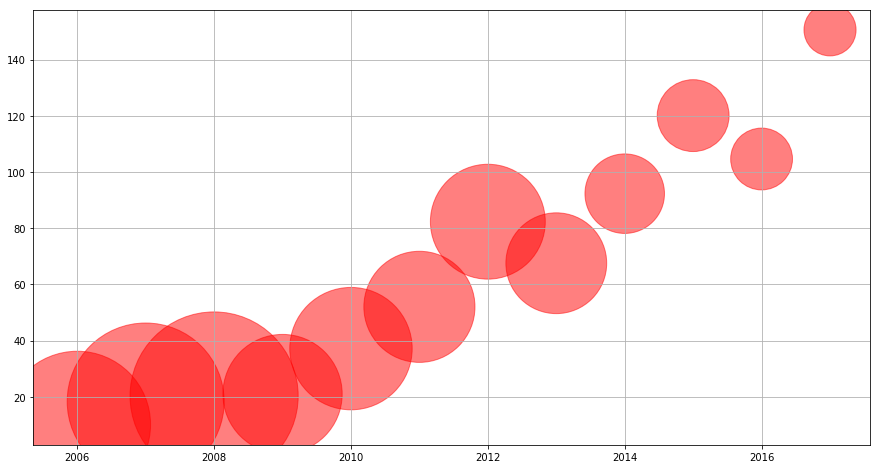

In [444]:
Price_Volume_Change('AAPL')

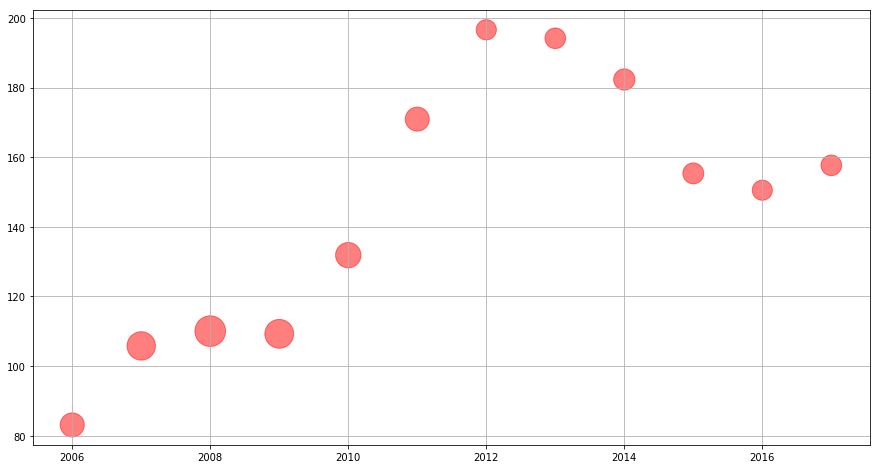

In [445]:
Price_Volume_Change('IBM')

# 4. Changes of three technical company (APPL, GOOG, MSFT ) everyday closing price in 2017

In [17]:
def company(data,company):
    a=data[data['Name']==company]
    return a


AAPL_1718=company(stocks_1718,'AAPL')
GOOGL_1718=company(stocks_1718,'GOOGL')
MSFT_1718=company(stocks_1718,'MSFT')

In [18]:
AAPL_17=AAPL_1718[AAPL_1718['year']==2017]
GOOGL_17=GOOGL_1718[GOOGL_1718['year']==2017]
MSFT_17=MSFT_1718[MSFT_1718['year']==2017]

* Since Google's stock price is much more higher than Apple's and Microsoft's and here what I'm concerning about is the changes of their everyday close price, 

In [19]:
AAPL_17['close_return']=AAPL_17['Close'].map(lambda x: x / AAPL_17.iloc[0,4])
GOOGL_17['close_return']=GOOGL_17['Close'].map(lambda x: x / GOOGL_17.iloc[0,4])
MSFT_17['close_return']=MSFT_17['Close'].map(lambda x: x / MSFT_17.iloc[0,4])

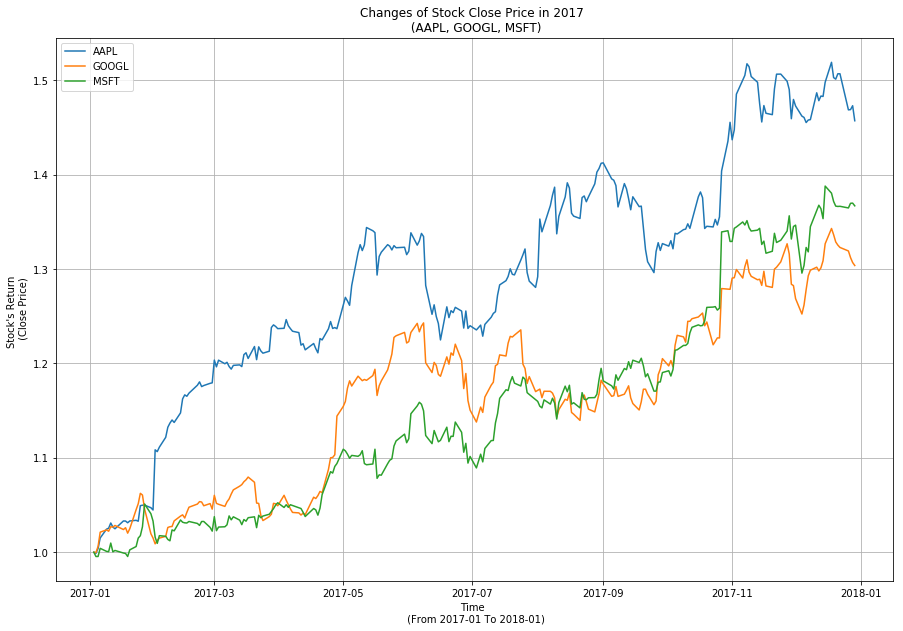

In [20]:
fig, ax =plt.subplots(figsize=(15,10))

ax.plot('Date', 'close_return', label='AAPL', data=AAPL_17)
ax.plot('Date', 'close_return', label='GOOGL',data=GOOGL_17)
ax.plot('Date', 'close_return', label='MSFT',data=MSFT_17)

ax.set_xlabel('Time \n (From 2017-01 To 2018-01)')
ax.set_ylabel('Stock\'s Return \n (Close Price)')
ax.set_title('Changes of Stock Close Price in 2017 \n (AAPL, GOOGL, MSFT)')

ax.grid(True)
ax.legend()

* The three technnical companies were more and more profitable in the first half year of 2017;
* The three technical companies's stock closing price were generally move in the same direction.

# 5. Bollinger Band of AABA in 2017

In [467]:
def BollingerBand(stock,year):
    title='Bollinger Band of '+stock+' in '+str(year)
    time='Time ('+str(year)+')'
    s=all_stocks[all_stocks['Name']==stock]
    s.loc[:,"20d"] = np.round(s.loc[:,"Close"].rolling(window = 20, center = False).mean(), 2)
    s.loc[:,"std"] = np.round(s.loc[:,"Close"].rolling(window = 20, center = False).std(), 2)
    s.loc[:,'+2std']=s.loc[:,"20d"]+2*s.loc[:,"std"]
    s.loc[:,'-2std']=s.loc[:,"20d"]-2*s.loc[:,"std"]
    s=s[s['year']==year]
    s=s.set_index('Date',drop=False)
    
    #####plot
    fig, ax =plt.subplots(figsize=(15,10))
    ax.plot('Date', 'Close', label='Close', data=s, color='c')
    ax.plot('Date', '20d', label='20d',data=s, color='r', alpha=0.4)
    ax.plot('Date', '+2std', label='+2std',data=s, color='b', alpha=0.2)
    ax.plot('Date', '-2std', label='-2std',data=s, color='b', alpha=0.2)
    ax.set_xlabel(time)
    ax.set_ylabel('Close Price')
    ax.set_title(title,size='x-large')
    ax.grid(True)
    ax.legend()
    plt.show()

/Users/lana/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/lana/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


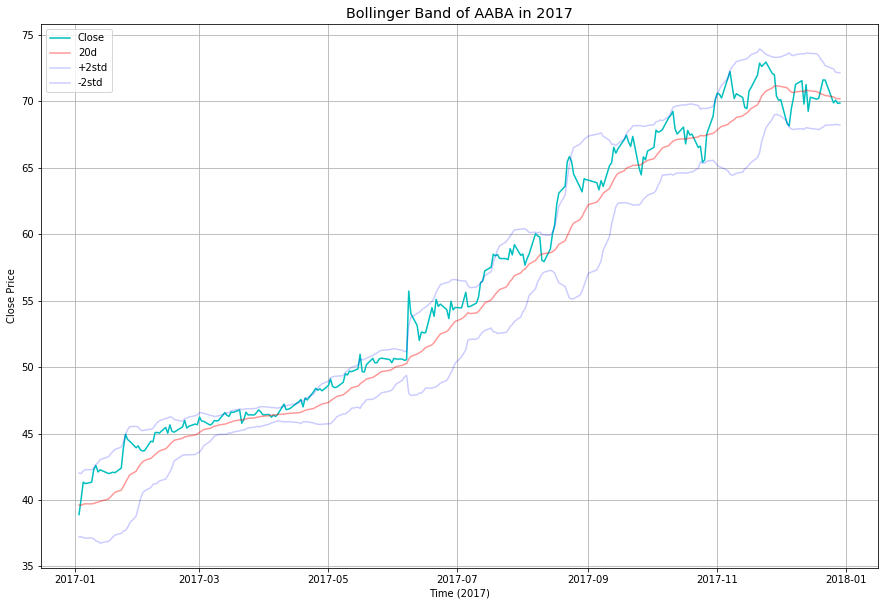

In [468]:
BollingerBand('AABA',2017)

/Users/lana/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/lana/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


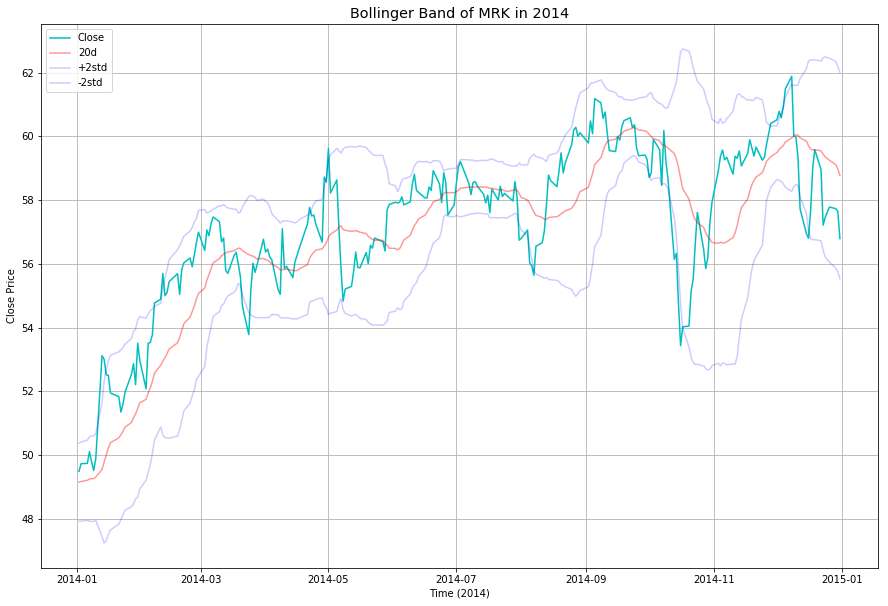

In [470]:
BollingerBand('MRK',2014)

## 6. Heat Map of the Month Average Close Price

calculate the average increase rate of close price of every stocks in a certain year

In [23]:
def StockMonthClose(year, stock):
    s=all_stocks[all_stocks['year']==year]
#     s=s[s['month']==month]
    s=s[s['Name']==stock]
    s=s.groupby('month',as_index=False)['Close'].mean().round(2)
    s.rename(columns={'Close':stock}, inplace=True)
    s.set_index('month', drop=False, inplace=True)
    return s

In [24]:
AABA_2017=StockMonthClose(2017,'AABA')
GOOGL_2017=StockMonthClose(2017,'GOOGL')
AMZN_2017=StockMonthClose(2017,'AMZN')
AAPL_2017=StockMonthClose(2017,'AAPL')
IBM_2017=StockMonthClose(2017,'IBM')
CAT_2017=StockMonthClose(2017,'CAT')

In [25]:
month_colse=pd.concat([AABA_2017,GOOGL_2017,AMZN_2017,AAPL_2017,IBM_2017,CAT_2017],axis=1)
month_colse.drop(['month'],axis=1,inplace=True)

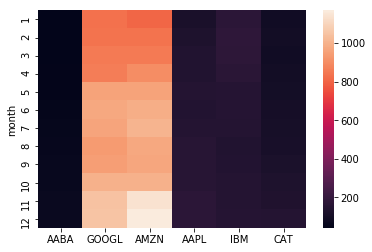

In [26]:
ax=sns.heatmap(month_colse)

## 7. Defined  a function to creat price rate of change  for a certain stock in a certain year

In [27]:
def PRC (stock, year):
    s=all_stocks[(all_stocks['year']==year) & (all_stocks['Name']==stock)]
    s['RateOfChange_Price']=((s['Close']-s['Open'])/s['Open']*100).round(4)
    s['RateOfChange_Price(+)']=((s['Close']-s['Open'])/s['Open']*100).round(4).abs()
    
    fig, ax = plt.subplots(figsize=(17,10))
    
    
    positive=s['RateOfChange_Price']>=0
    negative=s['RateOfChange_Price']<0
    
    ax.bar(s.Date[positive], s['RateOfChange_Price(+)'][positive], color='green')
    ax.bar(s.Date[negative], s['RateOfChange_Price(+)'][negative], color='red')
    
    x=stock+' Everyday Price Rate of Change in '+str(year)
    fig.suptitle(x, fontsize=20, fontweight='bold')
    ax.set_xlabel('Time', size='x-large')
    ax.set_ylabel('Price Rate of Change (%)', size='x-large')
    ax.set_title('A green volume bar means that the stock closed higher on that day verses the previous day\'s close. \nA red volume bar means that the stock closed lower on that day compared to the previous day\'s close.')
    ax.grid(True)
    plt.show()
    
    

/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


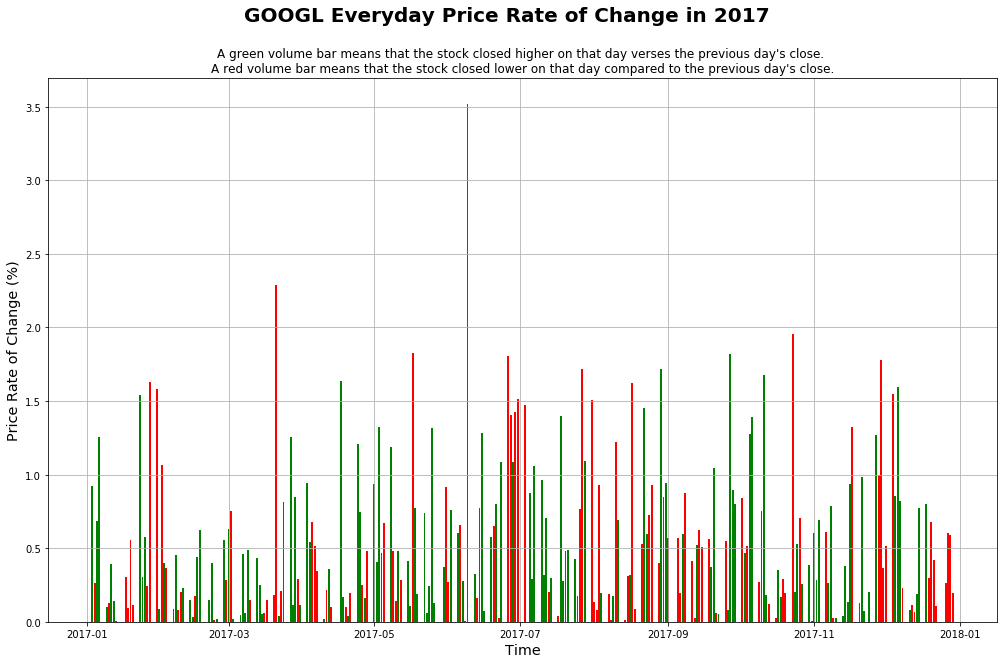

In [28]:
PRC('GOOGL', 2017)

/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


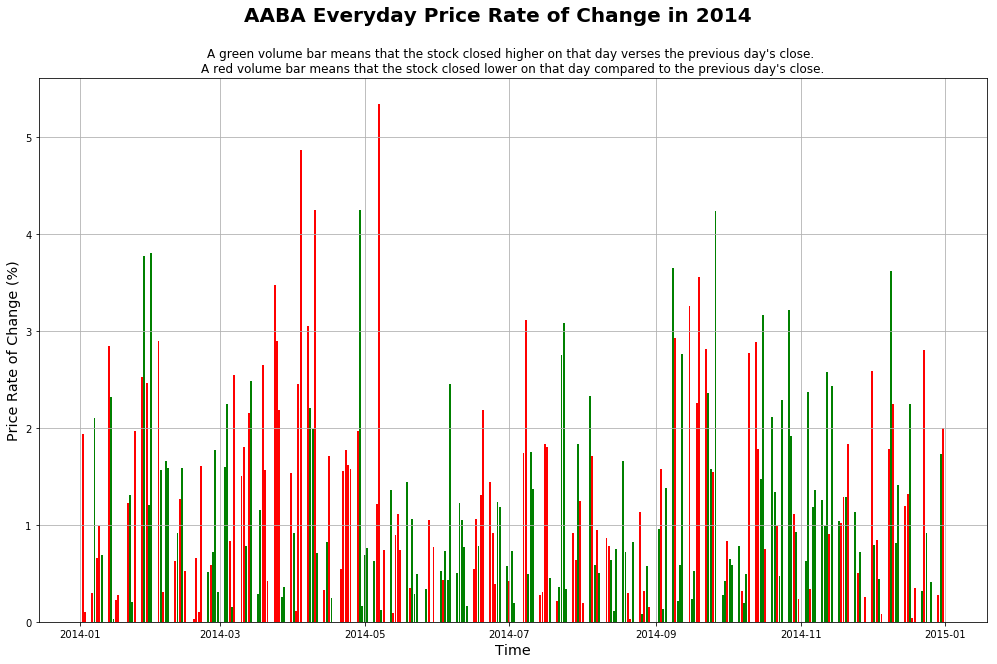

In [29]:
PRC('AABA', 2014)

## 8. Changes of each GOOGL stock colse price between days ( log differences)

In [454]:
def price_between_days(stock,year):
    title='change of '+stock+' Stock Colse Price between Days '+str(year)
    time='Time \n('+str(year)+')'
    s=all_stocks[all_stocks['Name']==stock]
    s=s[s['year']==year]
    s.loc[:,'log_colse']=s.loc[:,'Close'].map(lambda x: np.log(x))
    s.loc[:,'log_colse_diff']=s.log_colse.diff()
    #####plot
    fig, ax =plt.subplots(figsize=(15,10))
    ax.plot('Date', 'log_colse_diff', label=stock, data=s)
    ax.axhline(y=0, color='black',lw=2)
    ax.set_xlabel(time, size='x-large')
    ax.set_ylabel('Changes between Days\n(Close Price)' ,size='x-large')
    fig.suptitle(title, fontsize=20, fontweight='bold')
    ax.grid(True)
    ax.legend()
    plt.show()

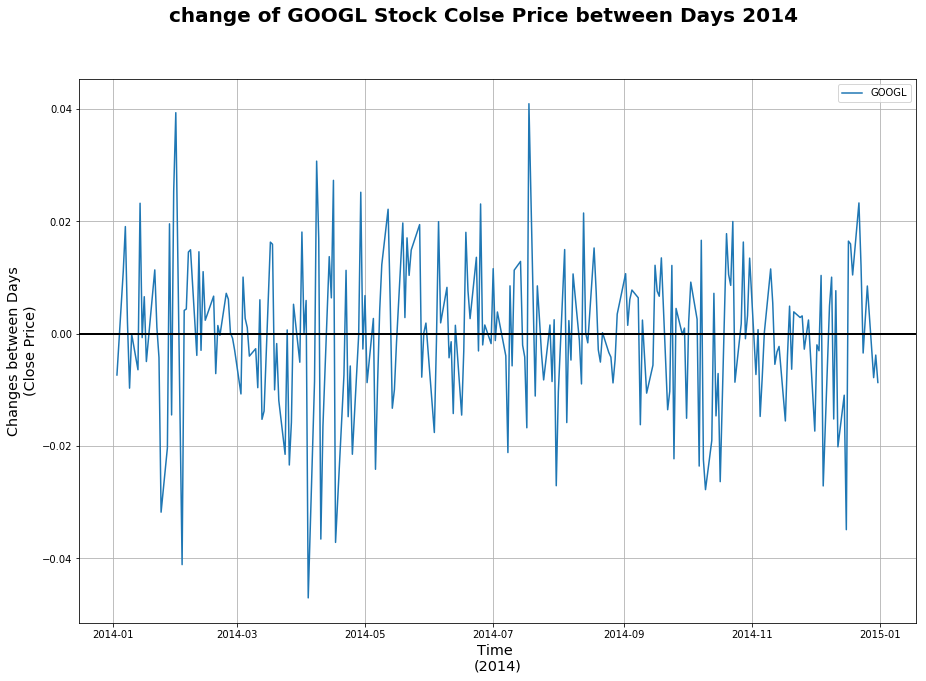

In [455]:
price_between_days('GOOGL',2014)

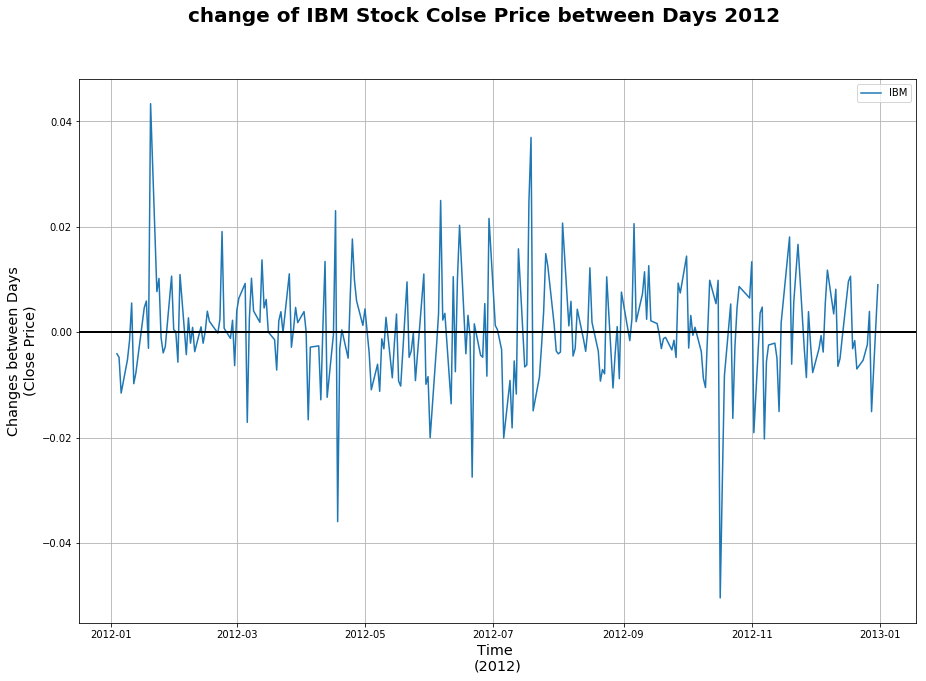

In [456]:
price_between_days('IBM',2012)

## 9. Defined a function to show the price and volume trend of a certain stock

In [260]:
def stock_year(stock, year):
    suptitle=stock+' Price and Volume Trend '+str(year)
    ct_title=stock+' CandleStick Plot in '+str(year)
    bar_title=stock+' Bar Chart of Volume in '+str(year)
    ########
    s=all_stocks[(all_stocks['Name']==stock) & (all_stocks['year']==year)]
    s['change']=s['Close']-s['Open']
    s['d20']=np.round((s['Close'].rolling(window=20, center=False).mean()),2)
    ############
    n_day=s['Date'].count()
    l=[999,]
    i=0
    while i<=n_day:
        l.append(i)
        i=i+25
    ##11 is the number of date showed in x_axis
    ###################
    fig=plt.figure(figsize=(18,13))
    fig.suptitle(suptitle, fontsize=15, fontweight='bold')
    fig.tight_layout()
    ax[0]=plt.subplot2grid((3,3),(0,0),colspan=3,rowspan=2)# candel-stick 
    ax[1]=plt.subplot2grid((3,3),(2,0),colspan=3)#bar-chart
    ######below defined bar chart#######
    positive=s['change']>=0
    negative=s['change']<0  
    ax[1].bar(s.Date[positive], s.Volume[positive], color='green')
    ax[1].bar(s.Date[negative], s.Volume[negative], color='red')
    ax[1].set_title(bar_title)
    ax[1].set_xlabel('Time', size='large')
    ax[1].set_ylabel('Volume', size='large')
    ax[1].grid(True)
    ######below defined candel-stick chart#####
    candlestick2_ohlc(ax[0],s['Open'],s['High'],s['Low'],s['Close']
                  ,width=1,colorup='#008000', colordown='#FF0000')
    ax[0].locator_params(axis='x', nbins=12)
    ax[0].set_title(ct_title)
    ax[0].set_ylabel('Price', size='large')
    #########
    date=[]
    for i in l:
        if i==0:
            d=s.iloc[i,0].strftime('%Y-%m-%d')
            date.append(d)
        elif i==999:
            d=0
            date.append(d)
        else:
            d=s.iloc[i,0].strftime('%Y-%m-%d')
            date.append(d)
    ax[0].set_xticklabels(date)
    ########
    ax[0].grid(True)
    
    plt.show()
    

/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


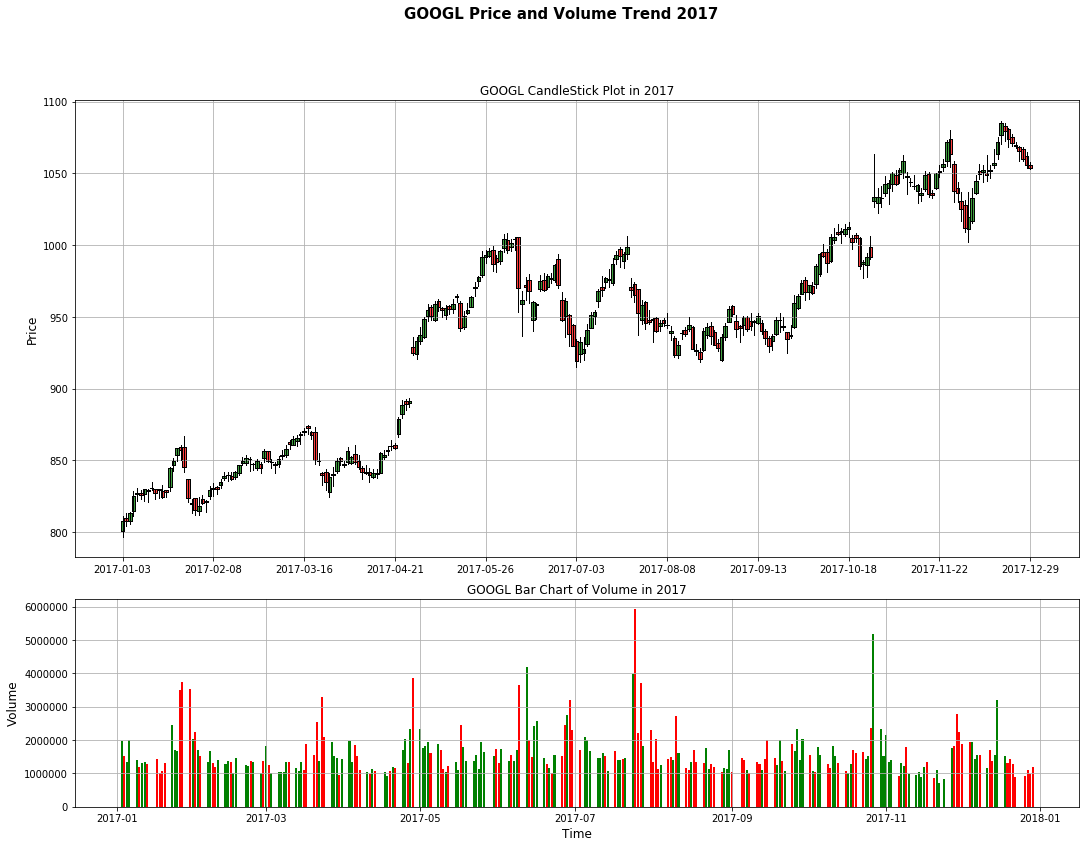

In [261]:
stock_year('GOOGL',2017)

* A GREEN candlestick indicates a day where the closing price was higher than the open (a gain), while a RED candlestick indicates a day where the open was higher than the close (a loss). 
* The wicks indicate the high and the low.

## 10. Moving Average Convergence Divergence Plot

In [395]:
def year_macd(stock,year):
    title=stock+' Moving Average Convergence Divergence Chart in'+str(year)
    s=all_stocks[(all_stocks['Name']==stock) & (all_stocks['year']==year)]
    p=[12, 26]
    for p in params:
        s['EMA'+str(p)]=pd.ewma(s['Close'], span=p)
    s['DIF'] = s['EMA12'] - s['EMA26']
    s['DEM'] = pd.ewma(s['DIF'], span=9)
    s['MACD'] = (s['DIF'] - s['DEM']) * 2
    ########plot
    fig, ax = plt.subplots(figsize=(18,13))
    ax.set_title(title, size='x-large')
    ax.set_xlabel('Time', size='large')
    ax.set_ylabel('Index', size='large')
    ax.plot(s.Date, s.DIF, label='DIF', color='black', alpha=0.8)
    ax.plot(s.Date, s.DEM, label='DEM', color='blue', alpha=0.8)
    positive=s['MACD']>=0
    negative=s['MACD']<0
    ax.bar(s.Date[positive], s.MACD[positive], label='MACD_positive',color='green',alpha=0.5)
    ax.bar(s.Date[negative], s.MACD[negative], label='MACD_negative',color='red',alpha=0.5)
    ax.grid(True)
    ax.legend()
    fig.show()

/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
  
/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=26,min_periods=0,adjust=True,ignore_na=False).mean()
  
/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

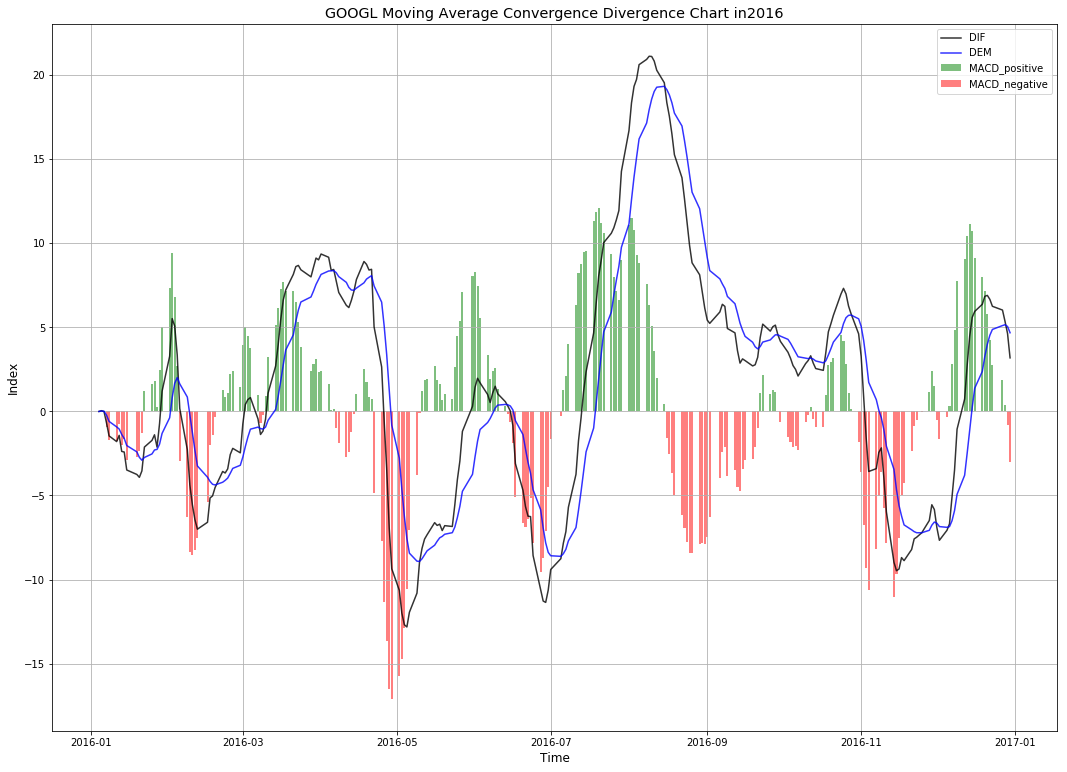

In [396]:
year_macd('GOOGL',2016)

/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
  
/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=26,min_periods=0,adjust=True,ignore_na=False).mean()
  
/Users/lana/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

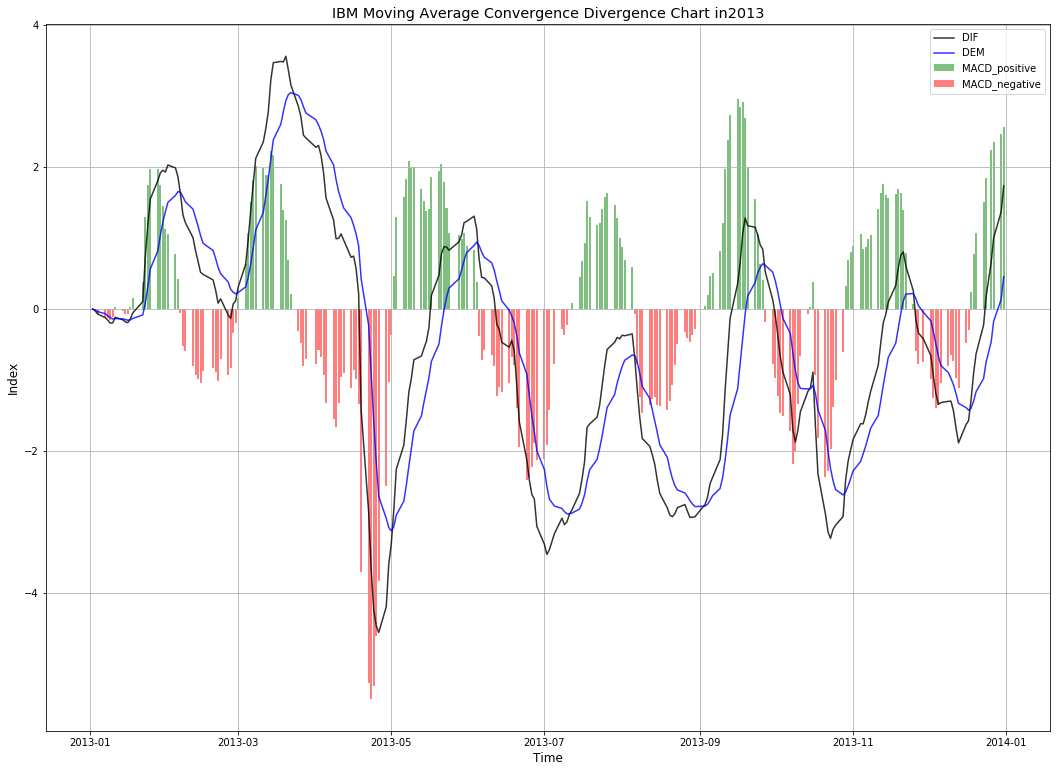

In [397]:
year_macd('IBM',2013)